## Monte Carlo Simulation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === PARAMETERS ===
ticker = 'AAPL'
data_path = f'../data/{ticker}.csv'
column = f'{ticker}.3'
forecast_horizon = 30
n_simulations = 1000

### LOAD AND PREPARE DATA

In [3]:
df = pd.read_csv(data_path, header=1)
df = df[df['Ticker'] != 'Date']
df['Date'] = pd.to_datetime(df['Ticker'])
df.set_index('Date', inplace=True)
df['Close'] = pd.to_numeric(df[column], errors='coerce')
df = df[['Close']].dropna()

### CALCULATE LOG RETURNS

In [4]:
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))
mean = df['Log_Return'].mean()
std = df['Log_Return'].std()
last_price = df['Close'].iloc[-1]

# === MONTE CARLO SIMULATION ===
simulations = np.zeros((forecast_horizon, n_simulations))
for i in range(n_simulations):
    prices = [last_price]
    for _ in range(forecast_horizon):
        shock = np.random.normal(loc=mean, scale=std)
        price = prices[-1] * np.exp(shock)
        prices.append(price)
    simulations[:, i] = prices[1:]

### PLOT SIMULATIONS

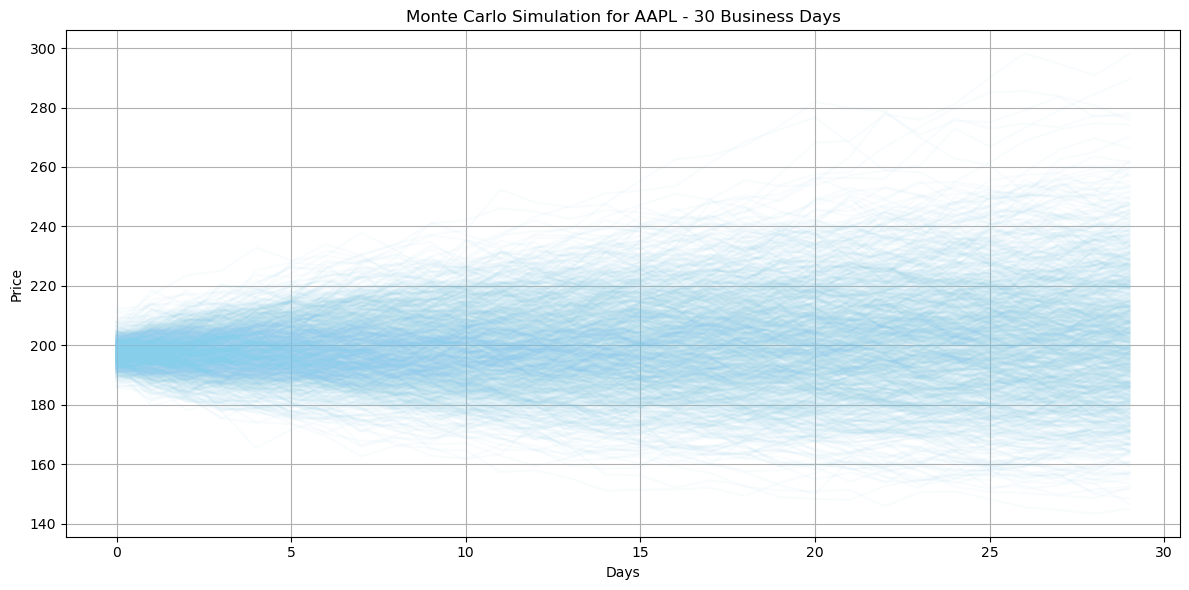

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(simulations, color='skyblue', alpha=0.05)
plt.title(f"Monte Carlo Simulation for {ticker} - {forecast_horizon} Business Days")
plt.xlabel("Days")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()

### STATISTICAL SUMMARY

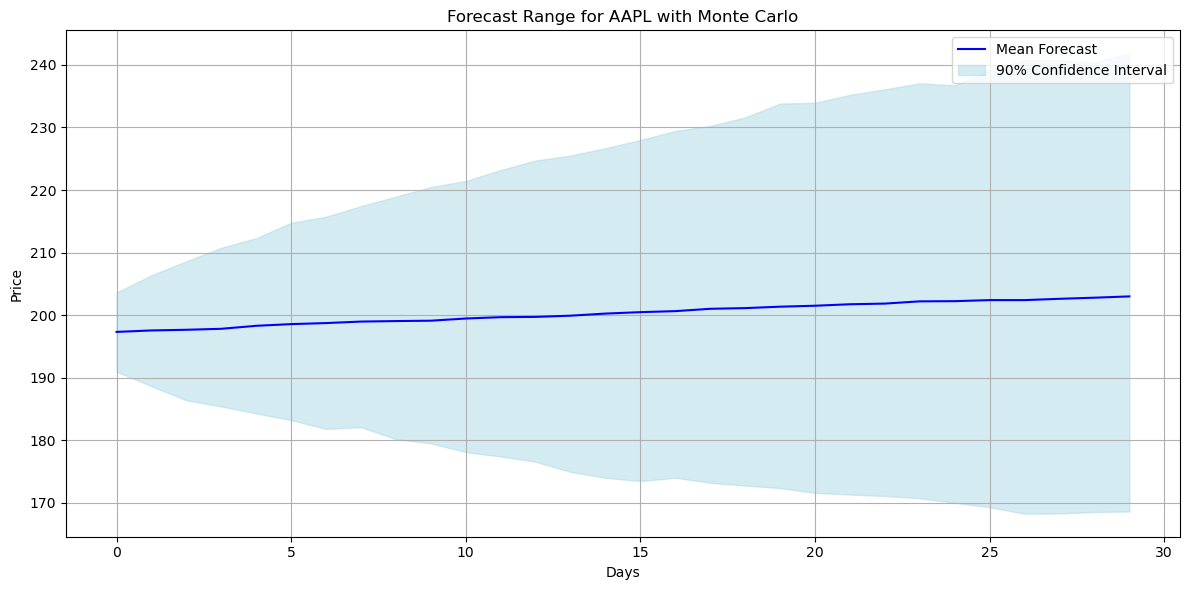

In [6]:
forecast_mean = np.mean(simulations, axis=1)
lower_bound = np.percentile(simulations, 5, axis=1)
upper_bound = np.percentile(simulations, 95, axis=1)

plt.figure(figsize=(12, 6))
plt.plot(forecast_mean, label='Mean Forecast', color='blue')
plt.fill_between(range(forecast_horizon), lower_bound, upper_bound, color='lightblue', alpha=0.5, label='90% Confidence Interval')
plt.title(f"Forecast Range for {ticker} with Monte Carlo")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()